# Wine Dataset Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

wdf = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wdf['target'] = wine_data.target

# Display the first few rows
wdf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


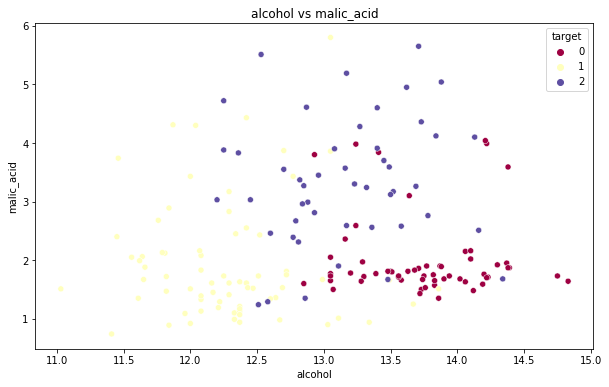

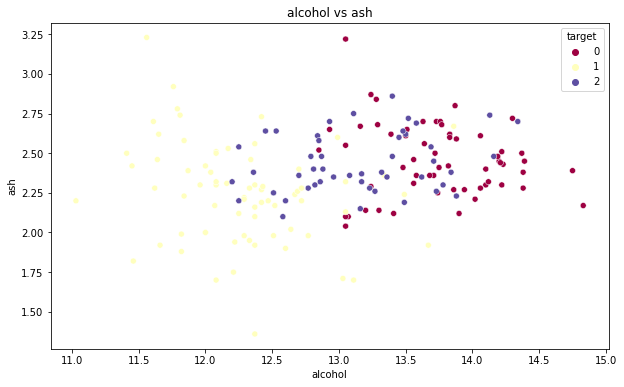

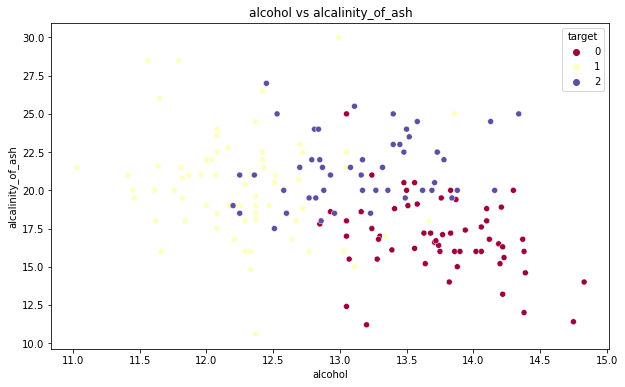

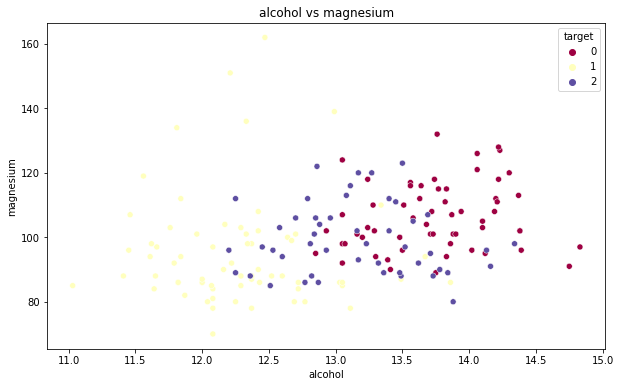

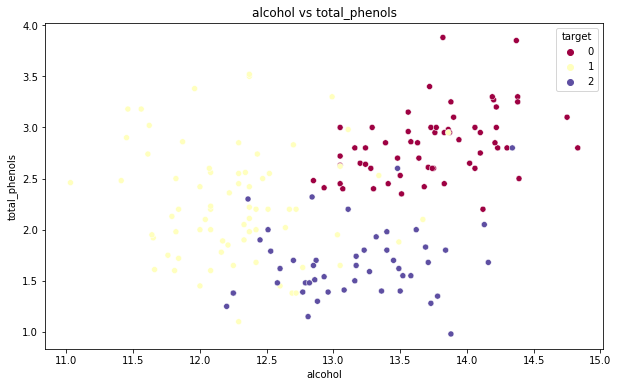

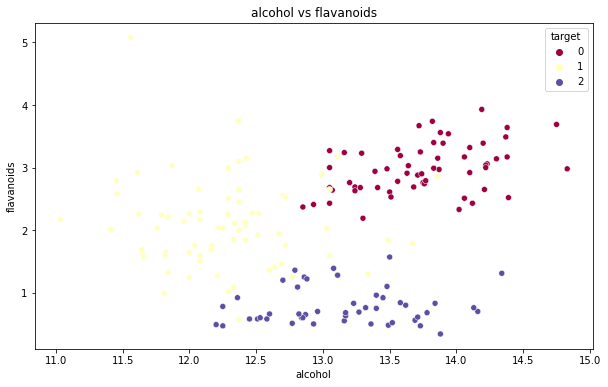

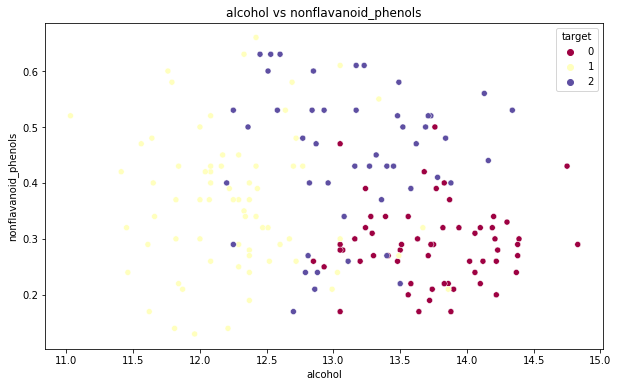

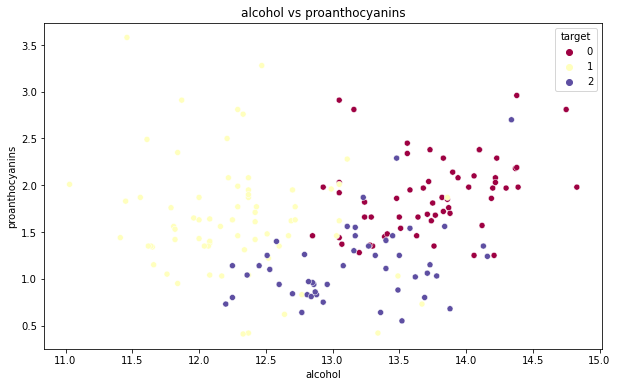

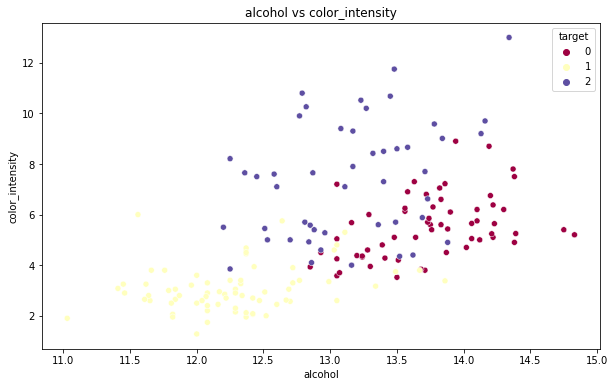

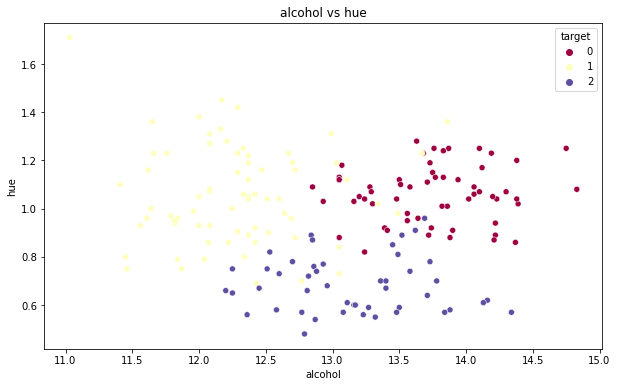

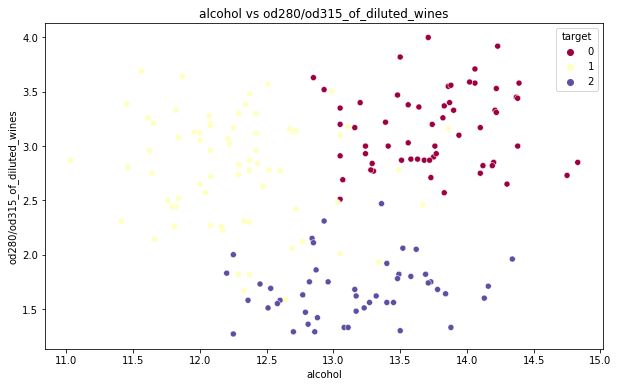

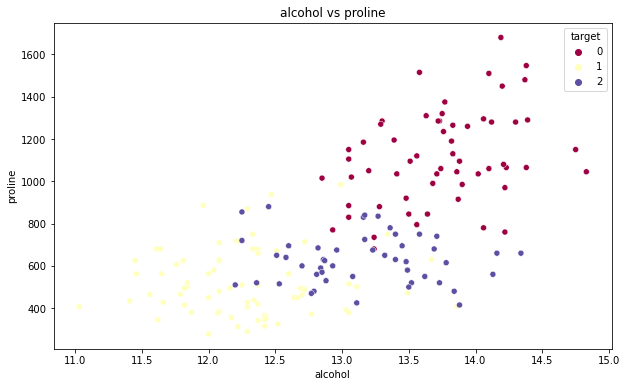

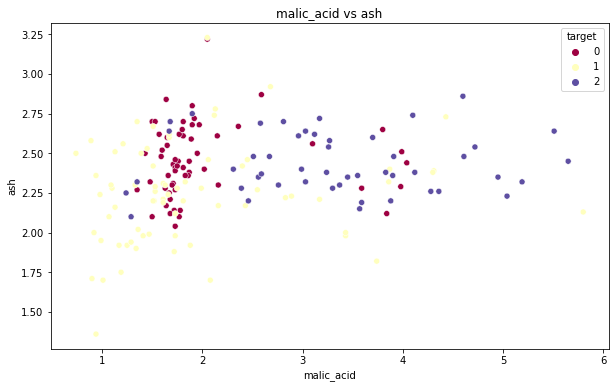

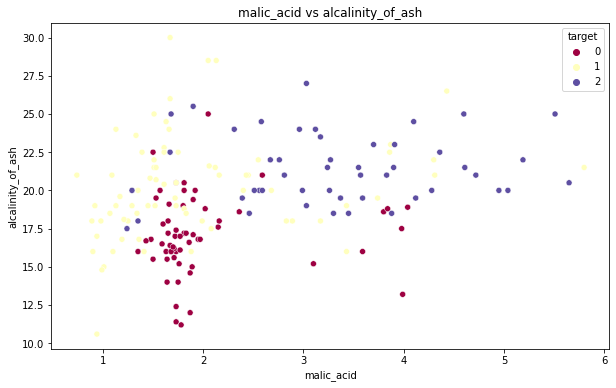

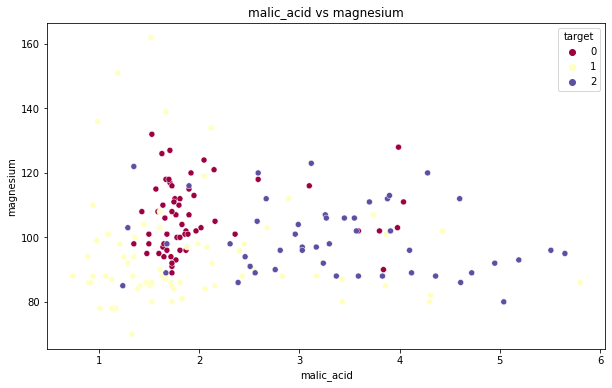

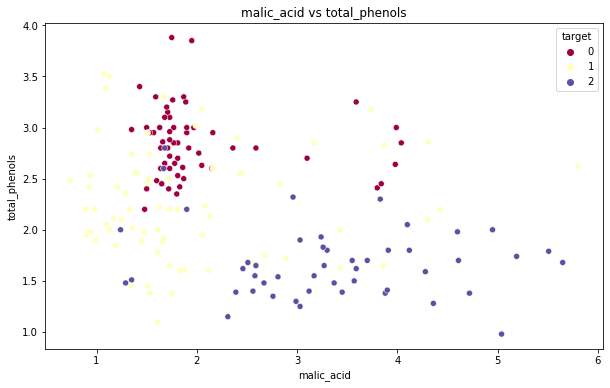

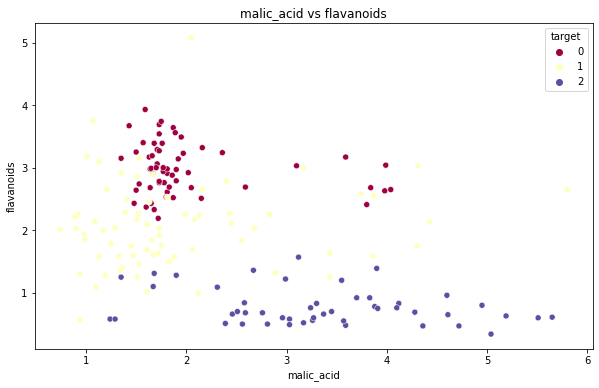

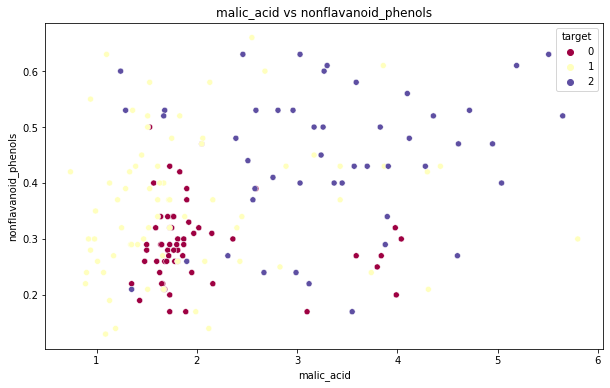

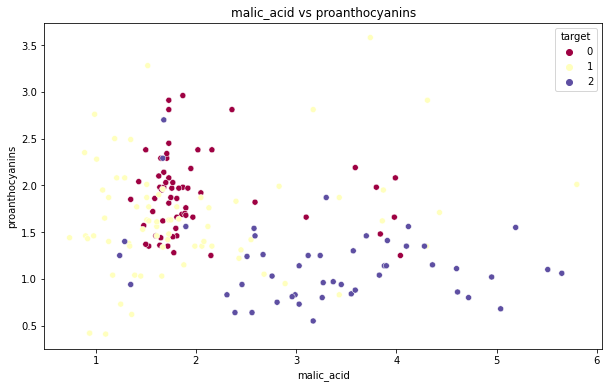

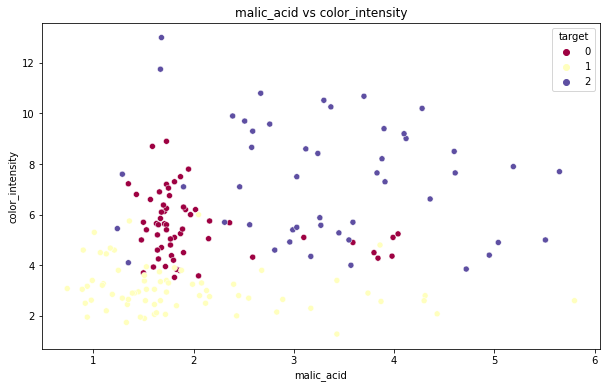

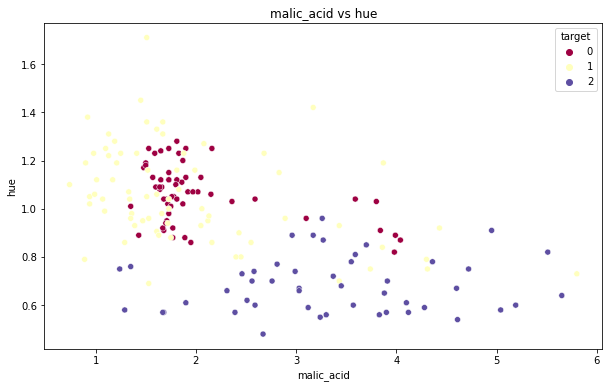

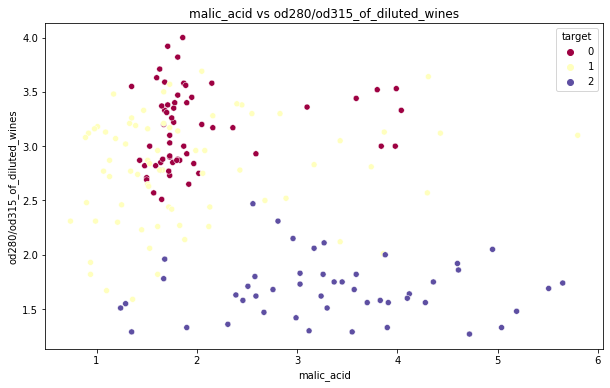

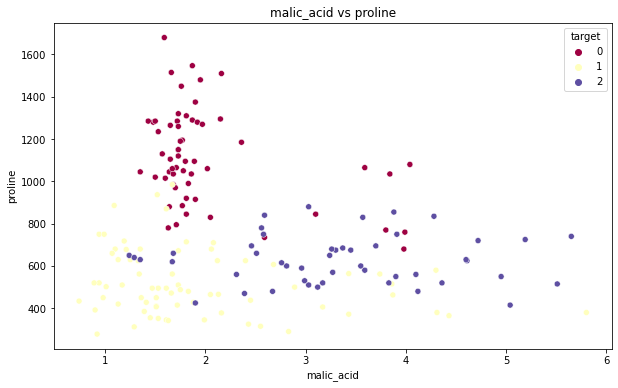

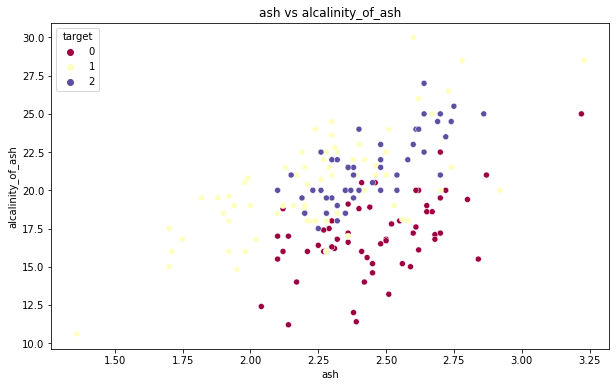

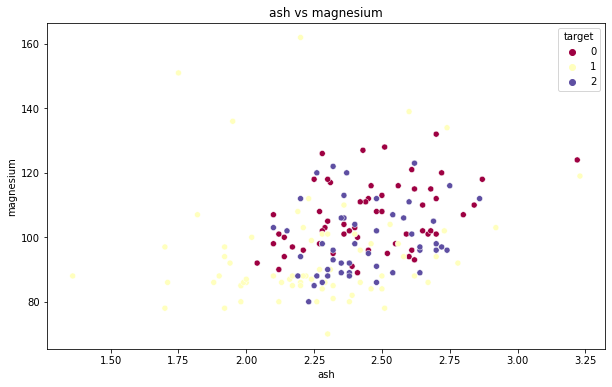

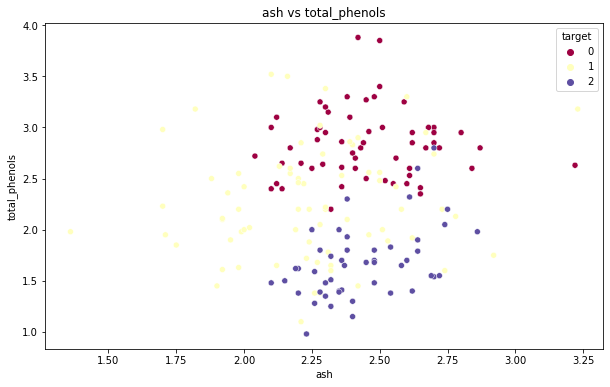

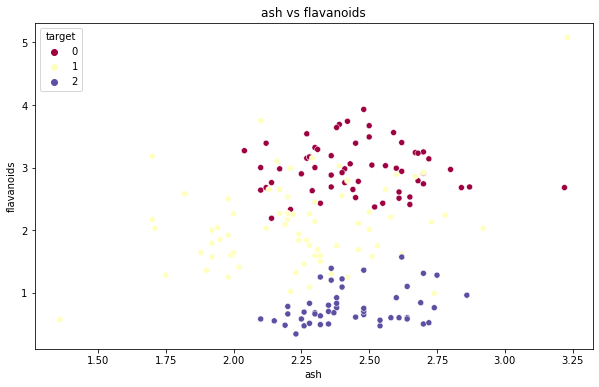

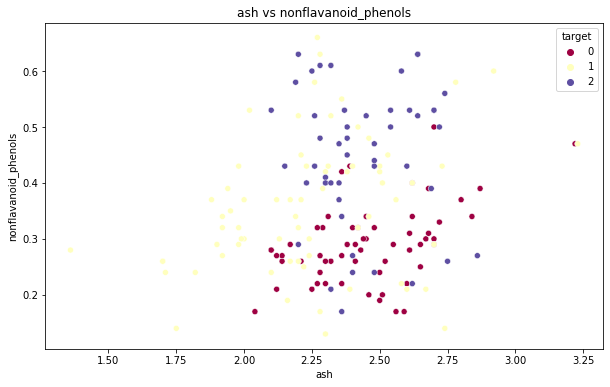

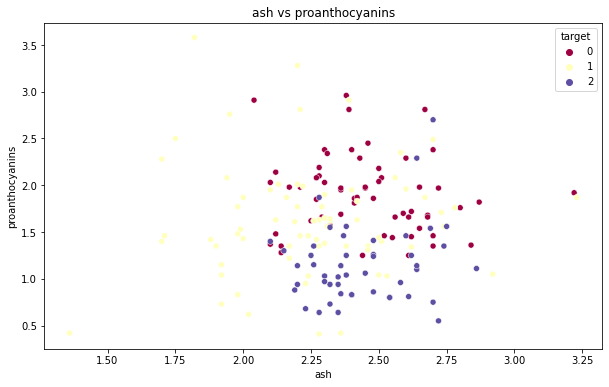

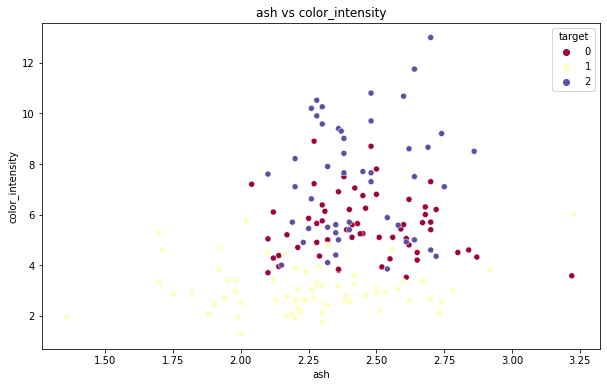

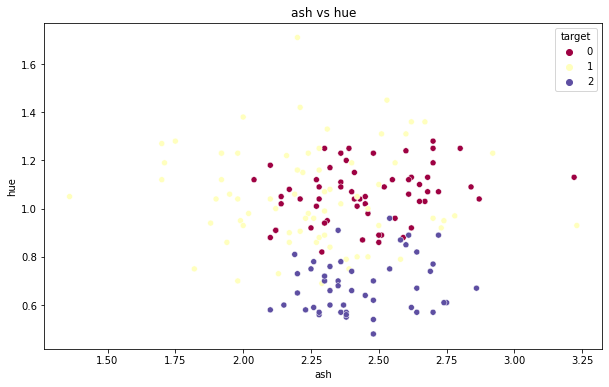

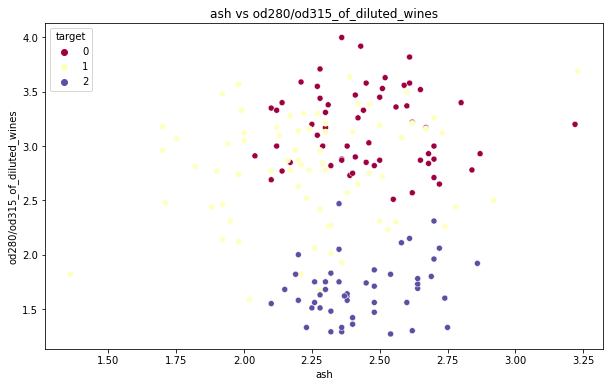

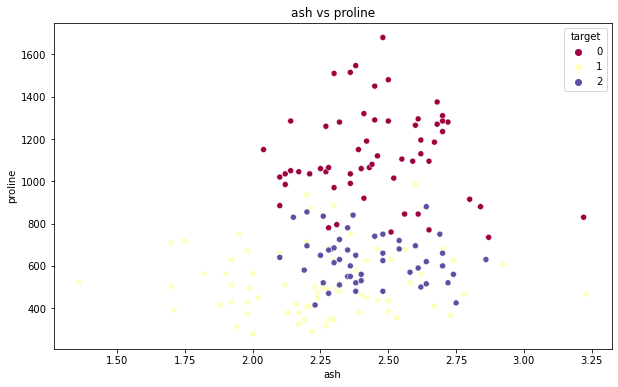

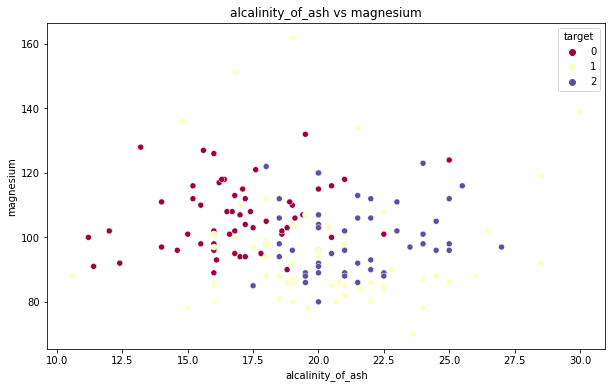

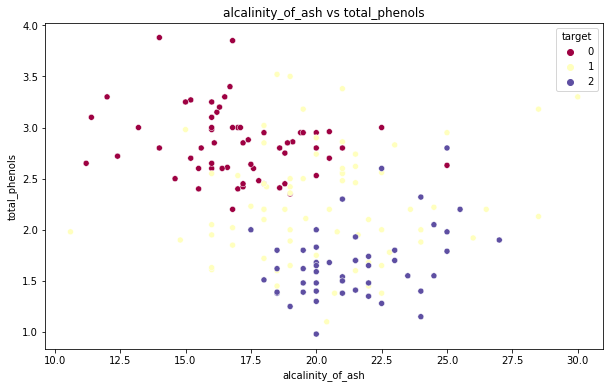

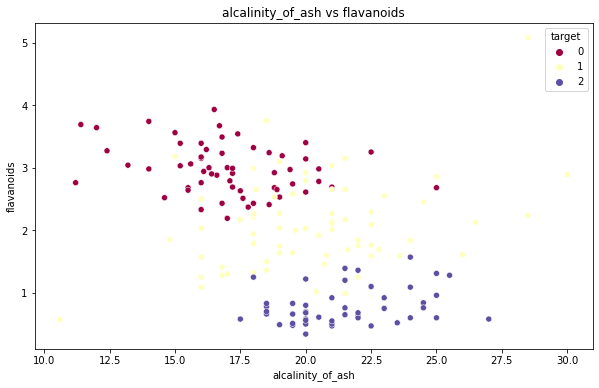

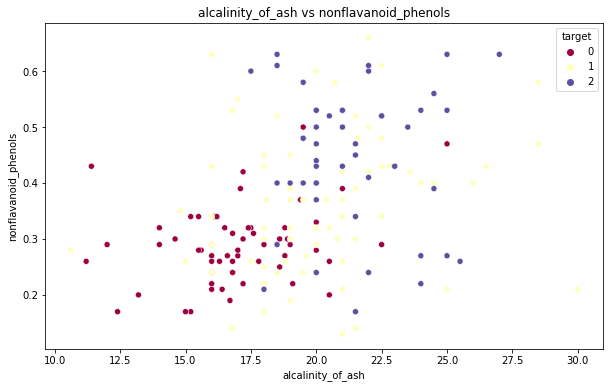

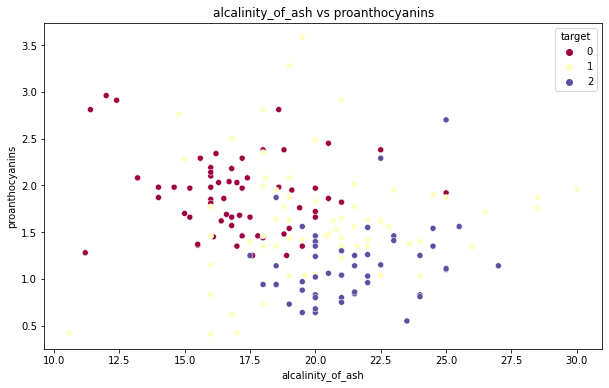

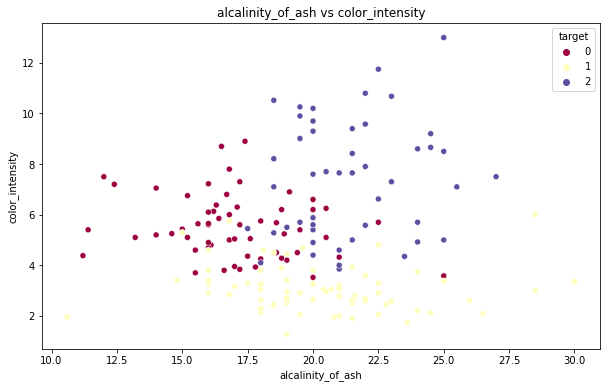

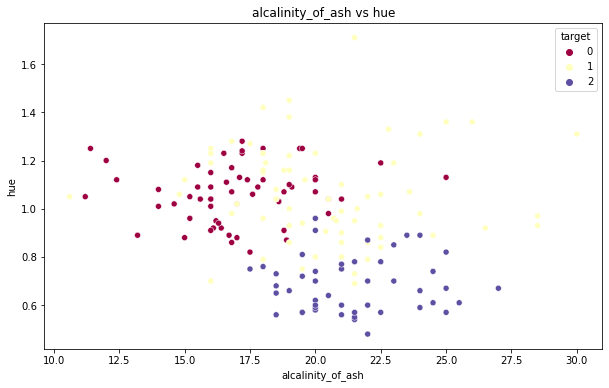

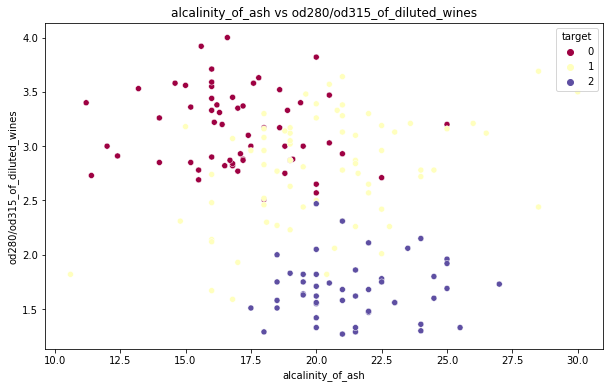

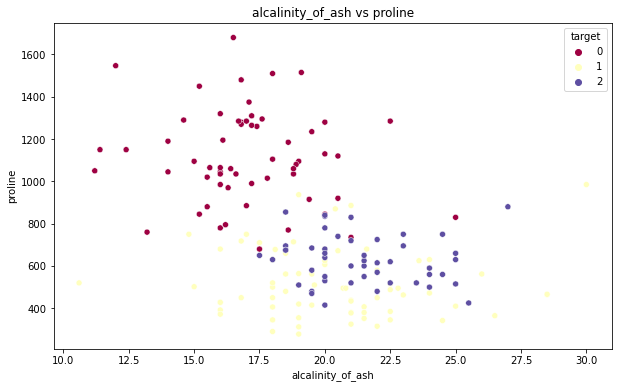

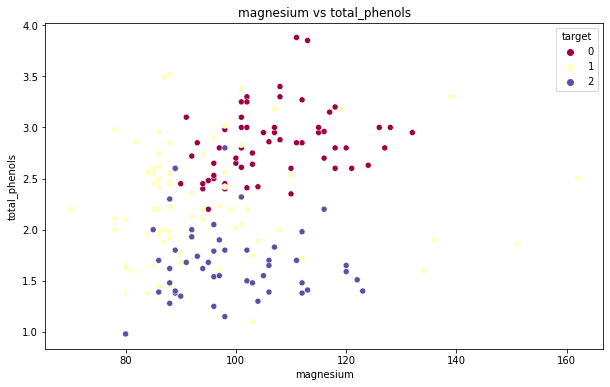

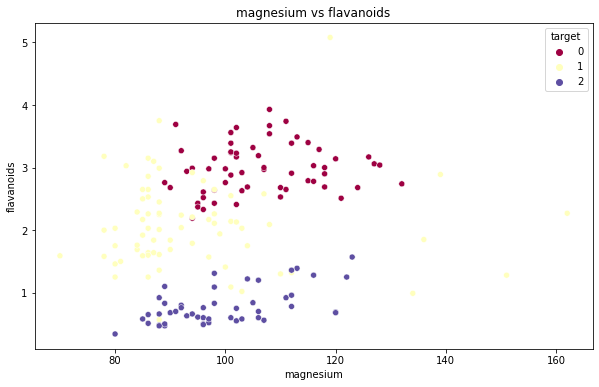

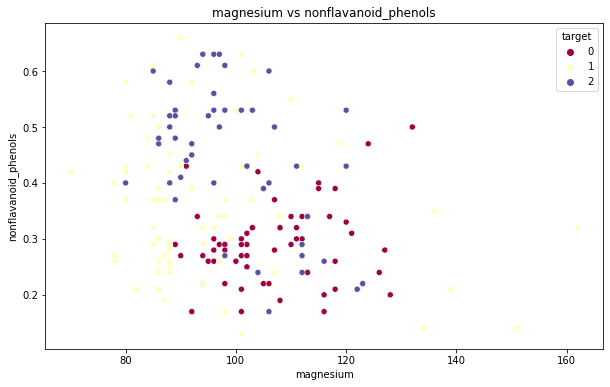

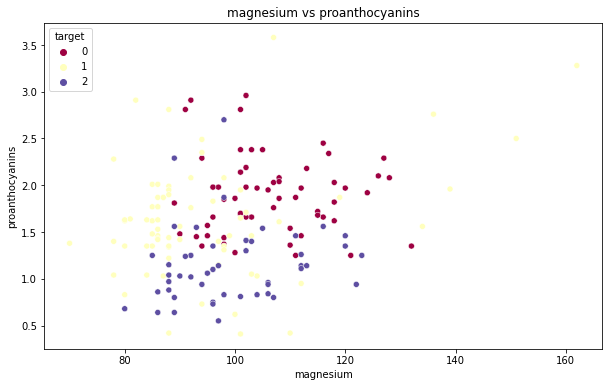

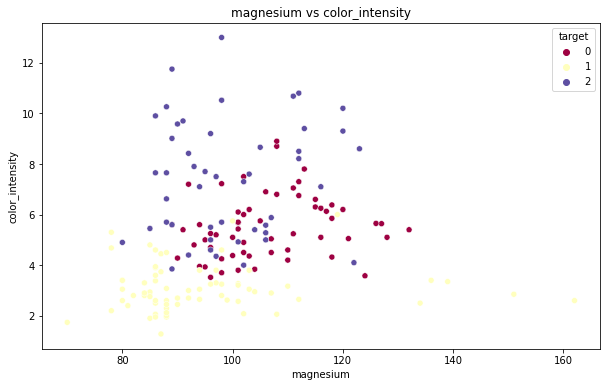

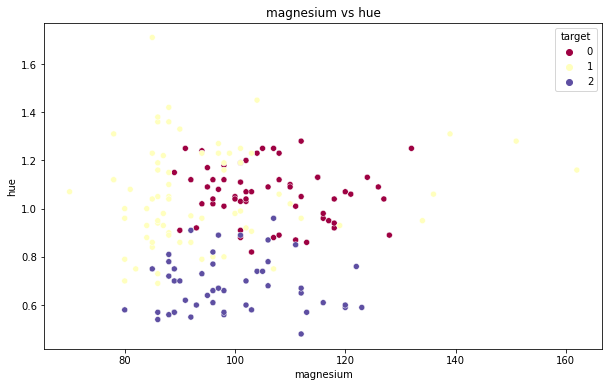

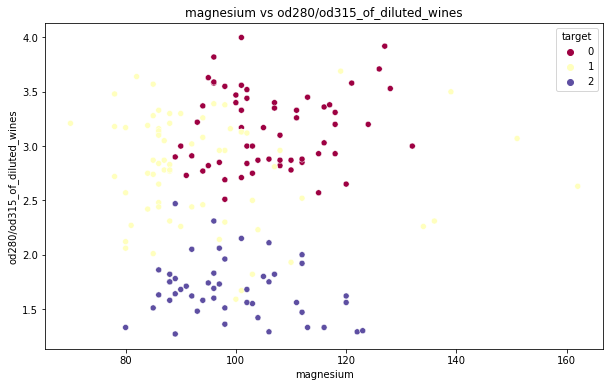

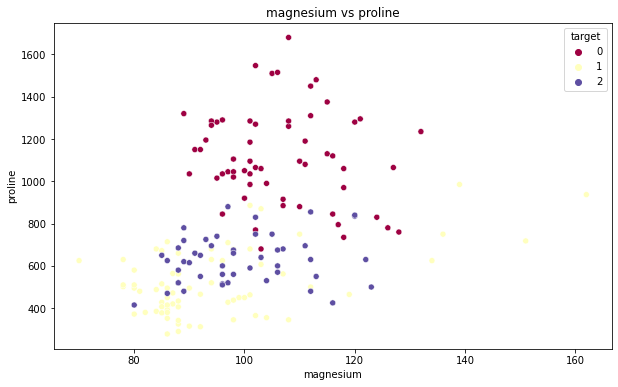

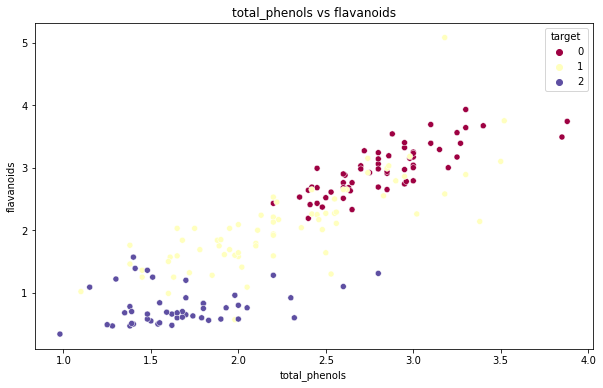

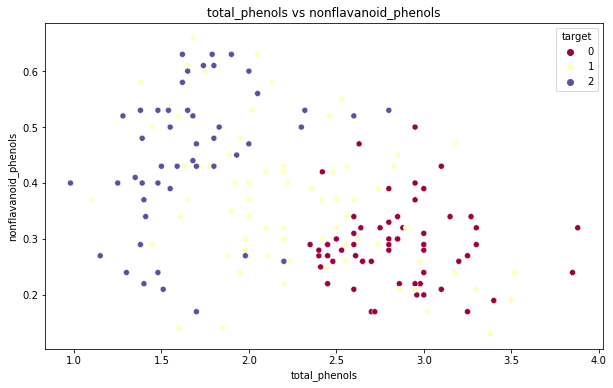

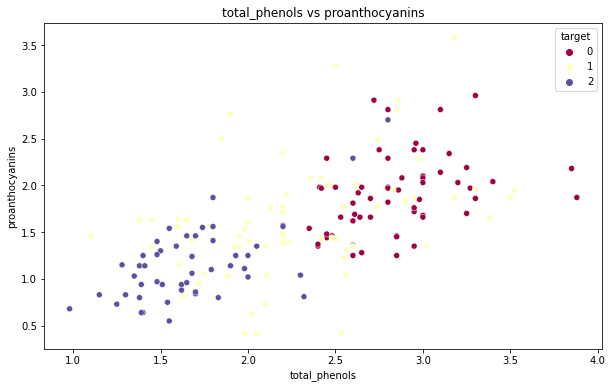

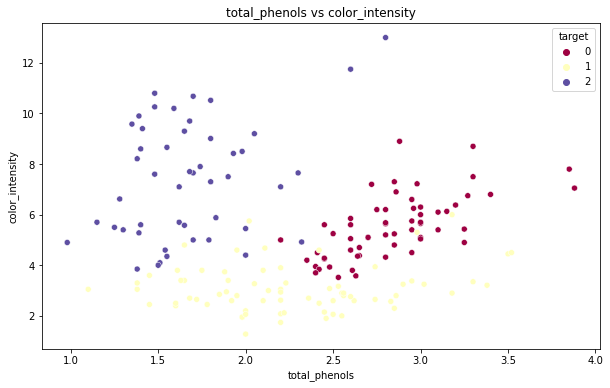

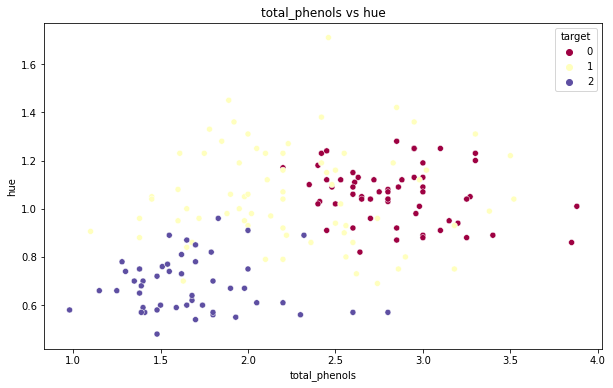

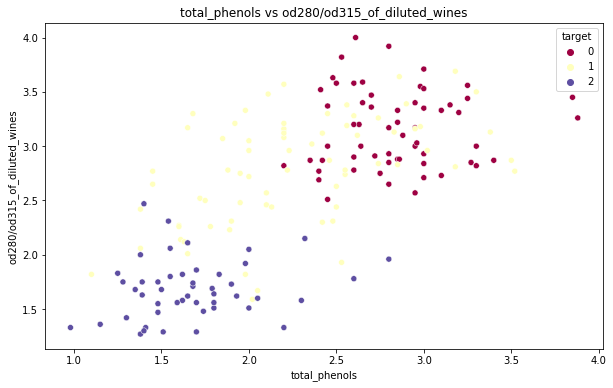

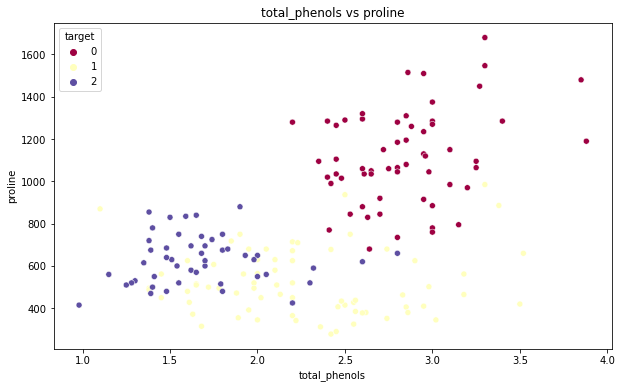

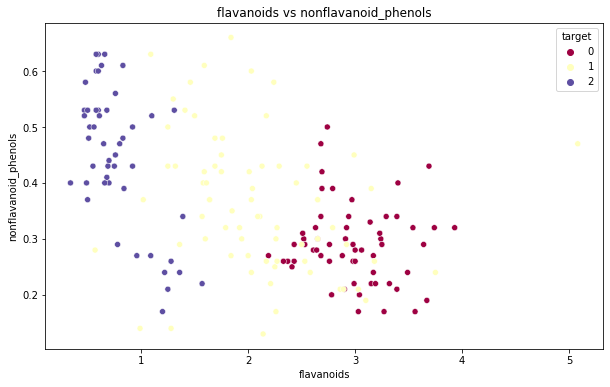

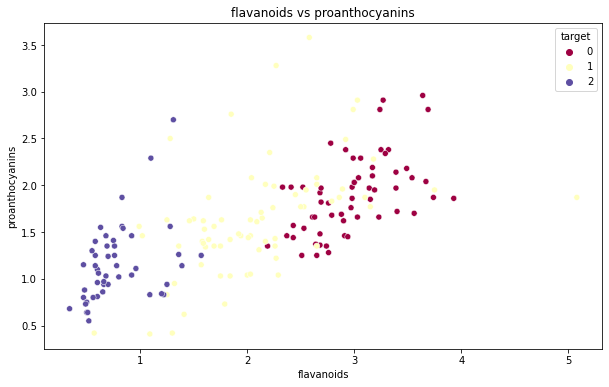

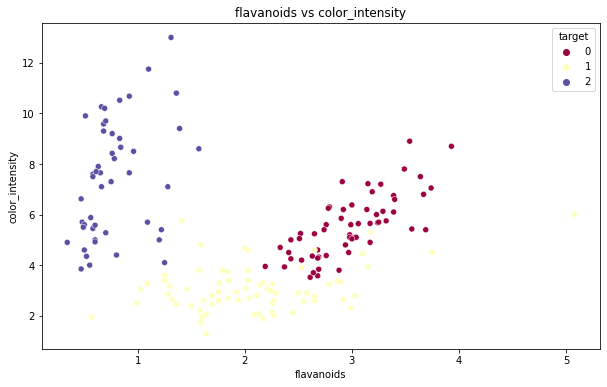

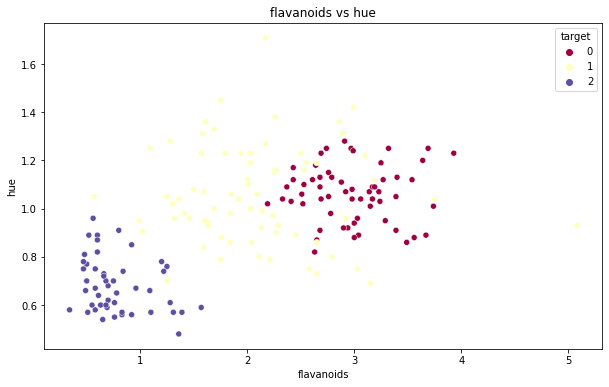

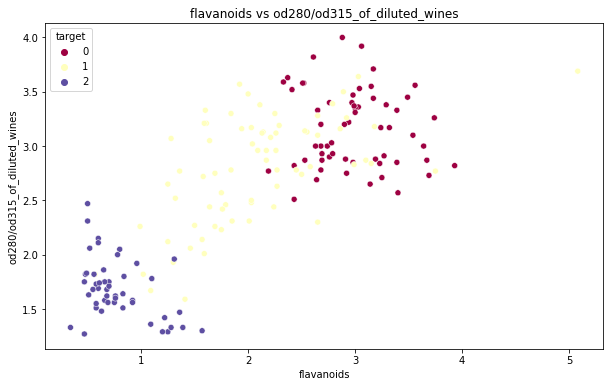

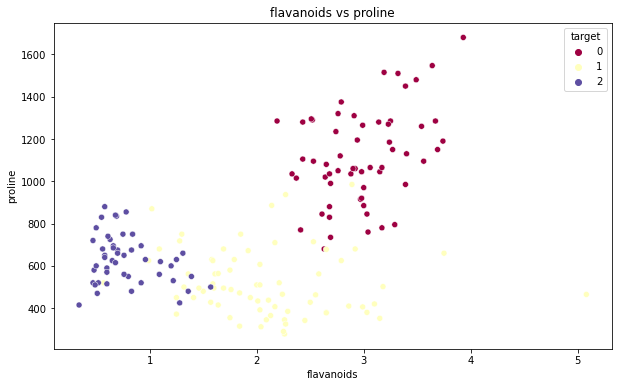

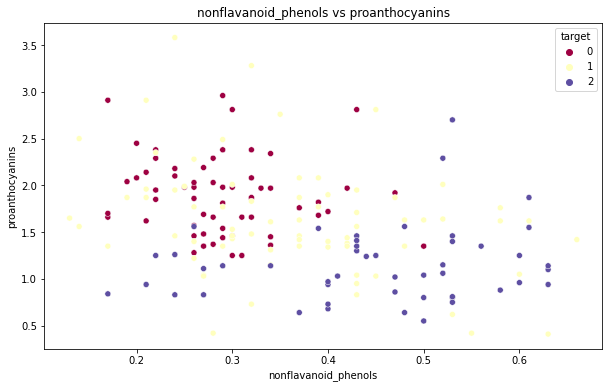

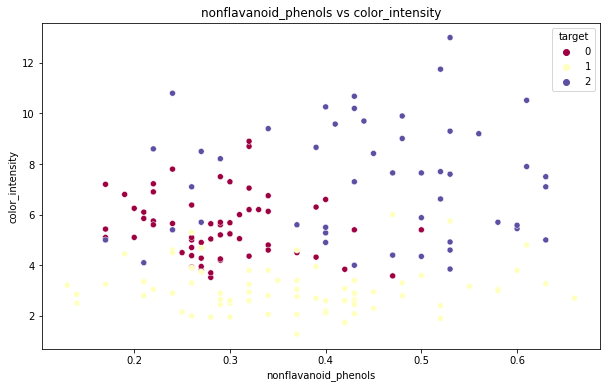

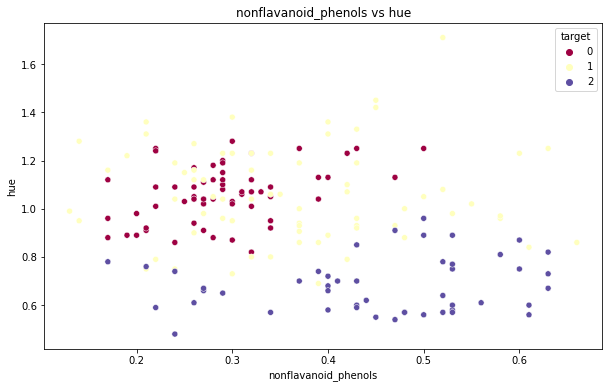

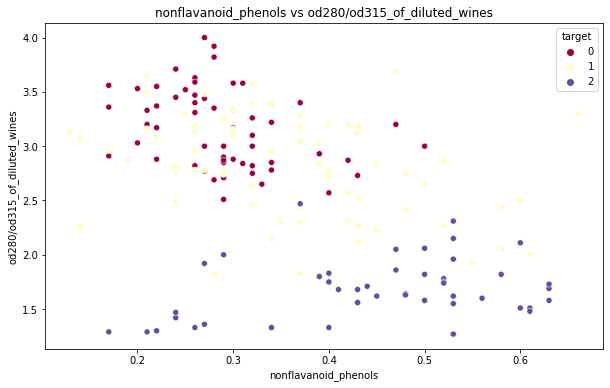

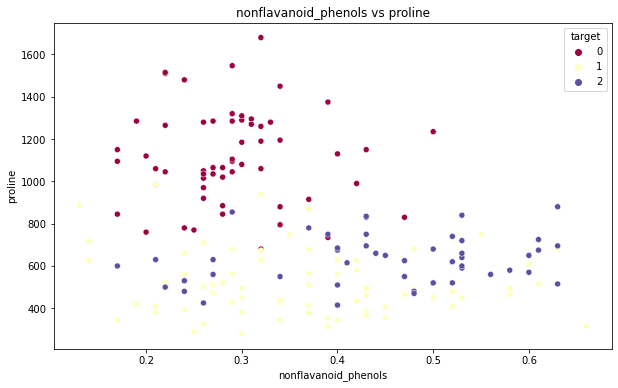

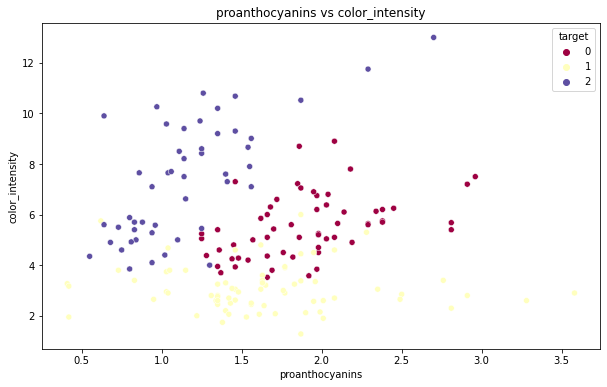

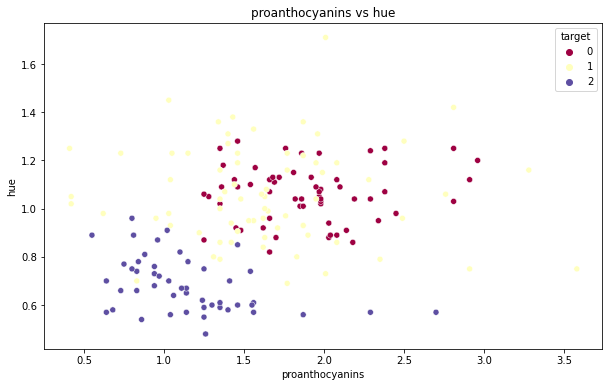

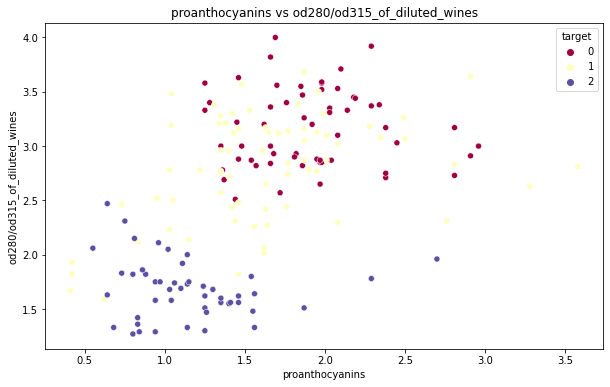

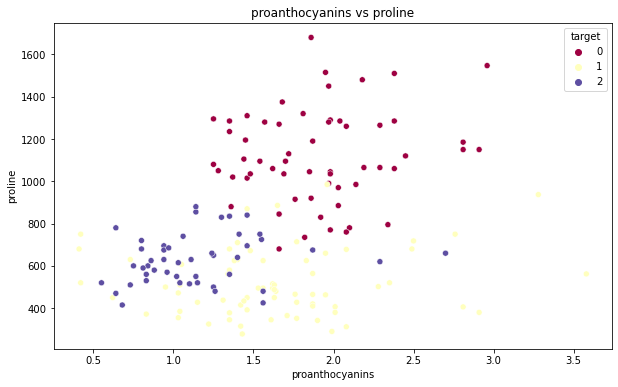

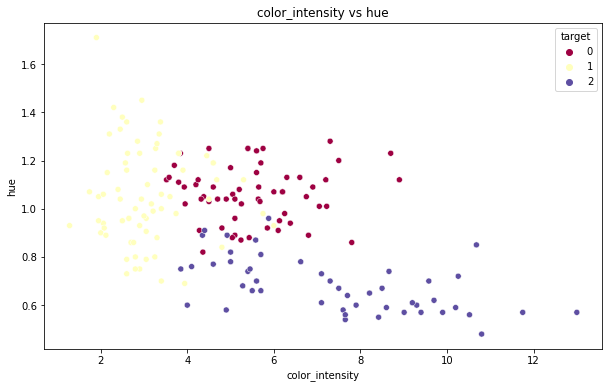

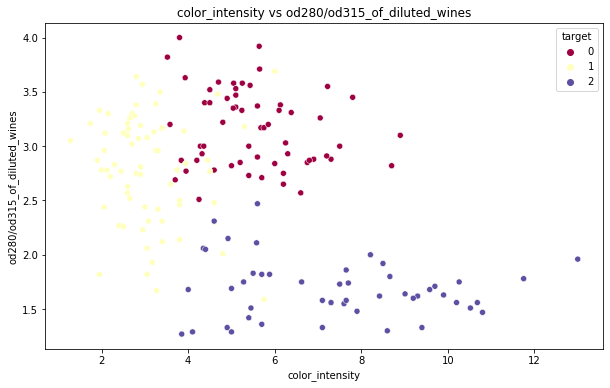

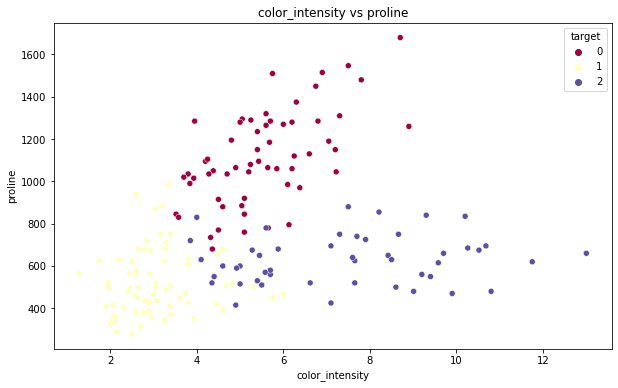

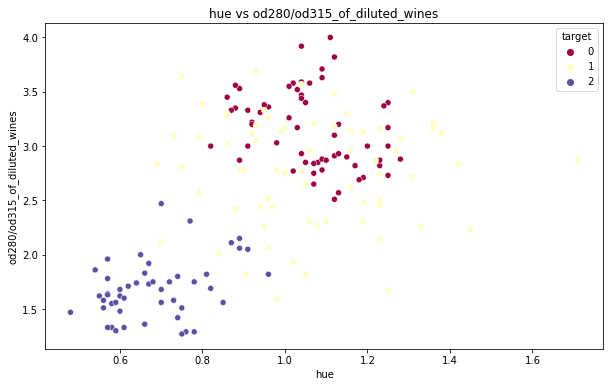

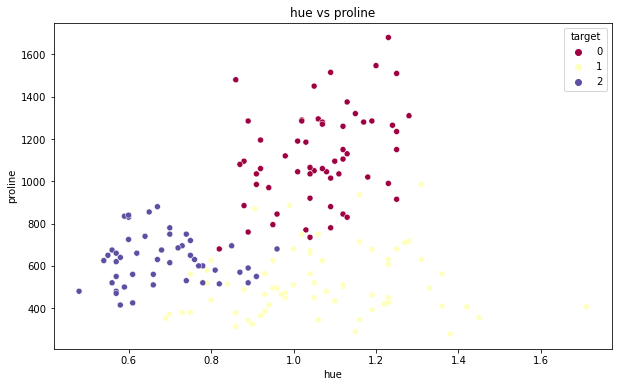

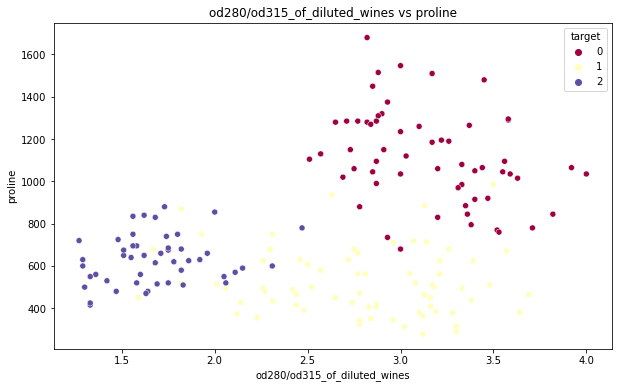

In [2]:
wf = wine_data.feature_names
for i in range(len(wf)):
    for j in range(i+1, len(wf)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=wf[i], y=wf[j], hue='target', data=wdf, palette='Spectral')
        plt.title(f'{wf[i]} vs {wf[j]}')
        plt.show()

# 20 Newsgroups Dataset Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import pandas as pd

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')

# Vectorize the text data with TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(newsgroups.data)

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300)
X_tsne = tsne.fit_transform(X.toarray())

# Prepare a DataFrame for visualization
df = pd.DataFrame(X_tsne, columns=['x', 'y'])
df['target'] = newsgroups.target
df['target_name'] = df['target'].apply(lambda i: newsgroups.target_names[i])

# Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(x='x', y='y', hue='target_name', palette=sns.color_palette('hsv', len(newsgroups.target_names)), data=df, legend='full', alpha=0.6)
plt.title("20 Newsgroups Dataset visualization")
plt.show()


# Breast Cancer Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()
features = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.Series(dataset.target, name='target')
df = pd.concat([features, target], axis=1)

In [ ]:
def scatter_plot(df, feature1, feature2):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature1, y=feature2, hue='target', palette='Set1', data=df)
    plt.title(f'Scatter Plot of {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

In [ ]:
for f1 in ['mean radius', 'mean perimeter', 'mean area']:
    for f2 in ['mean texture', 'mean smoothness']:
        scatter_plot(df, f1, f2)